<a href="https://colab.research.google.com/github/Piramu-Mahalingam/DS-Course-Assignment-1/blob/main/Piramu%20M%20Miniproject%20ANN%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Basic libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# For showing images inline
%matplotlib inline

In [2]:
# Unzip the dataset
!unzip /content/archive.zip

Archive:  /content/archive.zip
  inflating: Covid19-dataset/test/Covid/0100.jpeg  
  inflating: Covid19-dataset/test/Covid/0102.jpeg  
  inflating: Covid19-dataset/test/Covid/0105.png  
  inflating: Covid19-dataset/test/Covid/0106.jpeg  
  inflating: Covid19-dataset/test/Covid/0108.jpeg  
  inflating: Covid19-dataset/test/Covid/0111.jpg  
  inflating: Covid19-dataset/test/Covid/0112.jpg  
  inflating: Covid19-dataset/test/Covid/0113.jpg  
  inflating: Covid19-dataset/test/Covid/0115.jpeg  
  inflating: Covid19-dataset/test/Covid/0118.jpeg  
  inflating: Covid19-dataset/test/Covid/0119.jpeg  
  inflating: Covid19-dataset/test/Covid/0120.jpg  
  inflating: Covid19-dataset/test/Covid/094.png  
  inflating: Covid19-dataset/test/Covid/096.png  
  inflating: Covid19-dataset/test/Covid/098.jpeg  
  inflating: Covid19-dataset/test/Covid/COVID-00003b.jpg  
  inflating: Covid19-dataset/test/Covid/COVID-00012.jpg  
  inflating: Covid19-dataset/test/Covid/COVID-00022.jpg  
  inflating: Covid19-dat

In [3]:
# Dataset paths
train_dir = "Covid19-dataset/train"
test_dir = "Covid19-dataset/test"

# Categories
categories = ["Covid", "Normal", "Viral Pneumonia"]

# Function to load images and labels
def load_data(data_dir, img_size=128):
    data = []
    labels = []
    for category in categories:
        folder_path = os.path.join(data_dir, category)
        class_label = categories.index(category)  # 0, 1, 2
        for img_file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_file)
            try:
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
                img = cv2.resize(img, (img_size, img_size))
                data.append(img)
                labels.append(class_label)
            except:
                print(f"Error loading: {img_path}")
    return np.array(data), np.array(labels)

# Load train and test data
X_train, y_train = load_data(train_dir, img_size=128)
X_test, y_test = load_data(test_dir, img_size=128)

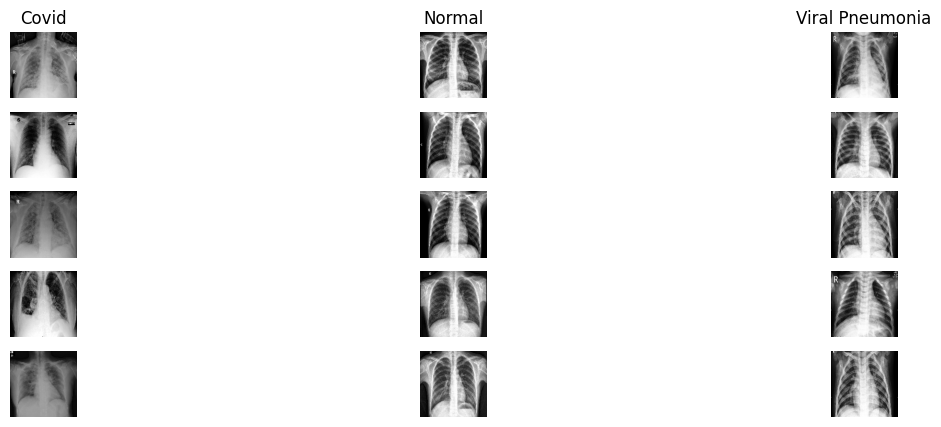

In [4]:
def show_samples(X, y, categories, samples_per_class=5):
    plt.figure(figsize=(15, 5))
    for idx, category in enumerate(categories):
        idxs = np.where(y == idx)[0]
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, img_idx in enumerate(idxs):
            plt_idx = i * len(categories) + idx + 1
            plt.subplot(samples_per_class, len(categories), plt_idx)
            plt.imshow(X[img_idx])
            plt.axis('off')
            if i == 0:
                plt.title(category)
    plt.show()

show_samples(X_train, y_train, categories)

In [5]:
from collections import Counter

train_counts = Counter(y_train)
test_counts = Counter(y_test)

print("Train Set Size per Class:")
for idx, category in enumerate(categories):
    print(f"{category}: {train_counts[idx]} images")

print("\nTest Set Size per Class:")
for idx, category in enumerate(categories):
    print(f"{category}: {test_counts[idx]} images")

Train Set Size per Class:
Covid: 111 images
Normal: 70 images
Viral Pneumonia: 70 images

Test Set Size per Class:
Covid: 26 images
Normal: 20 images
Viral Pneumonia: 20 images


In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
#Pre Processing
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# 1. Normalize pixel values (already done earlier)
X_train = X_train / 255.0
X_test = X_test / 255.0

# 2. Encode class labels
# Option A: One-hot encoding
y_train_cat = to_categorical(y_train, num_classes=len(categories))
y_test_cat = to_categorical(y_test, num_classes=len(categories))

# (OR) Option B: LabelEncoder (useful if you want integer labels only)
# encoder = LabelEncoder()
# y_train_enc = encoder.fit_transform(y_train)
# y_test_enc = encoder.transform(y_test)

# 3. Split training into train + validation (80-20 split)
X_train, X_val, y_train_cat, y_val_cat = train_test_split(
    X_train, y_train_cat, test_size=0.2, random_state=42, stratify=y_train
)

# Check shapes
print("Train set:", X_train.shape, y_train_cat.shape)
print("Validation set:", X_val.shape, y_val_cat.shape)
print("Test set:", X_test.shape, y_test_cat.shape)



Train set: (200, 128, 128, 3) (200, 3)
Validation set: (51, 128, 128, 3) (51, 3)
Test set: (66, 128, 128, 3) (66, 3)


/tmp/ipython-input-146387513.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=[train_counts[i] for i in range(len(categories))], ax=ax[0], palette="Blues")
/tmp/ipython-input-146387513.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=[val_counts[i] for i in range(len(categories))], ax=ax[1], palette="Greens")
/tmp/ipython-input-146387513.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=[test_counts[i] for i in range(len(categories))], ax=ax[2], palette="Oranges")


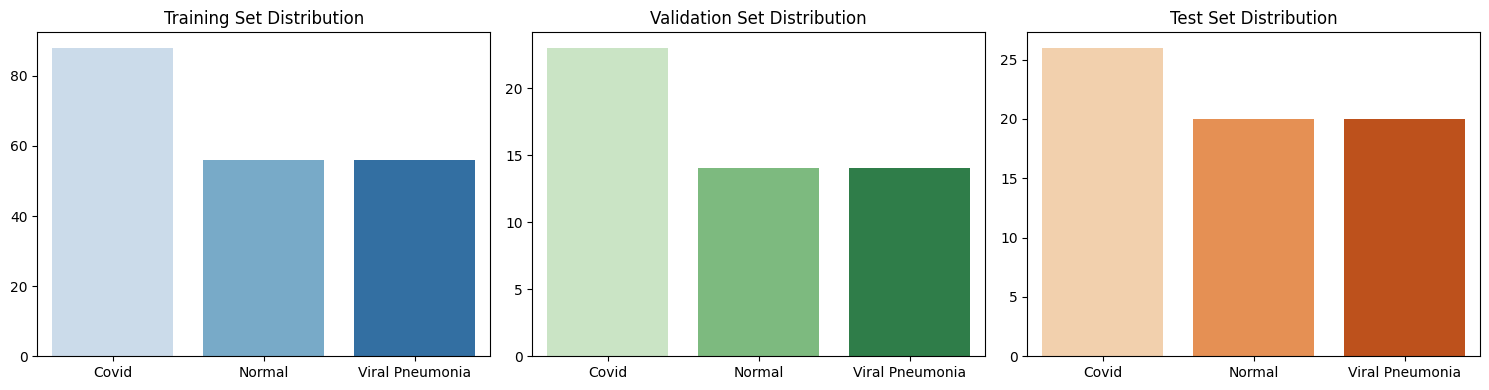

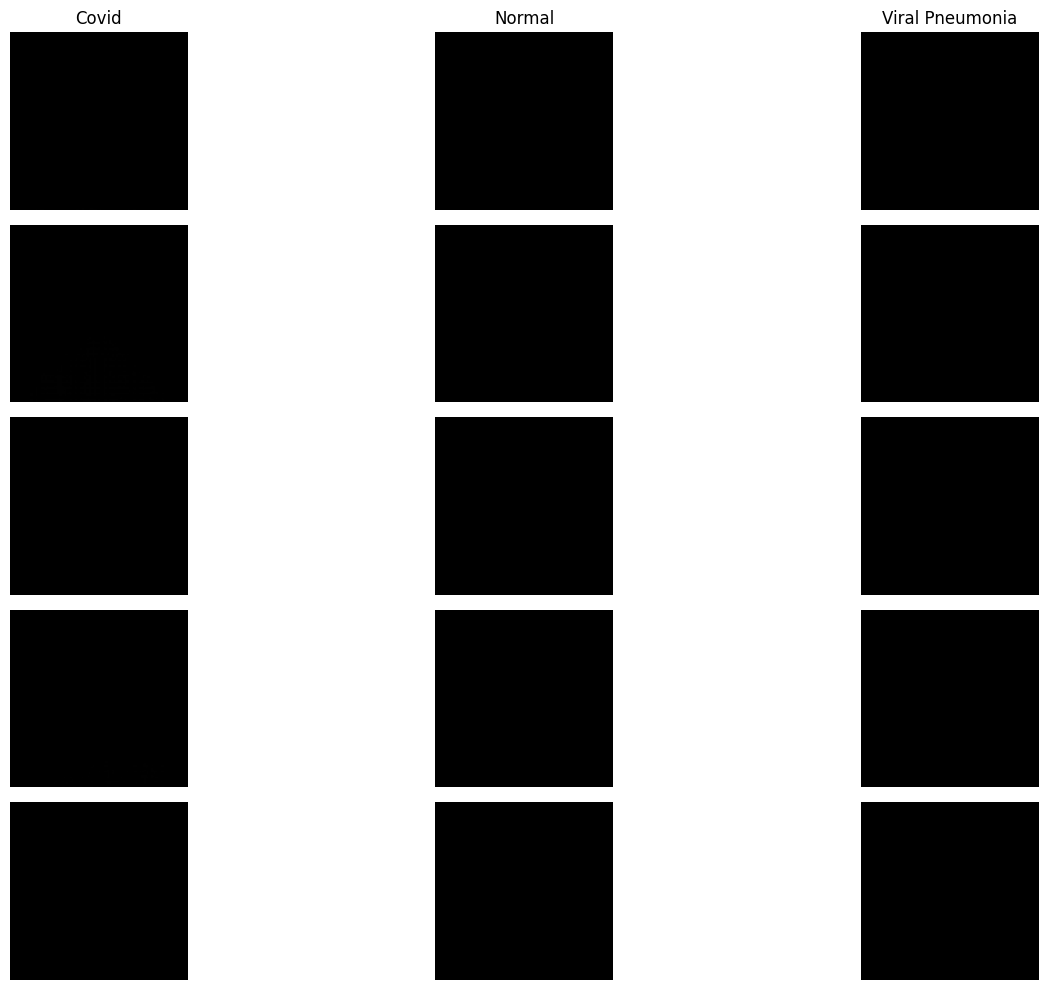

Image shape: (128, 128, 3)
Pixel value range: 0.0 to 0.00392156862745098


In [8]:
#EDA
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

# -----------------------------
# 1. Visualize Class Distribution
# -----------------------------
train_counts = Counter(np.argmax(y_train_cat, axis=1))
val_counts   = Counter(np.argmax(y_val_cat, axis=1))
test_counts  = Counter(np.argmax(y_test_cat, axis=1))

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

# Train distribution
sns.barplot(x=categories, y=[train_counts[i] for i in range(len(categories))], ax=ax[0], palette="Blues")
ax[0].set_title("Training Set Distribution")

# Validation distribution
sns.barplot(x=categories, y=[val_counts[i] for i in range(len(categories))], ax=ax[1], palette="Greens")
ax[1].set_title("Validation Set Distribution")

# Test distribution
sns.barplot(x=categories, y=[test_counts[i] for i in range(len(categories))], ax=ax[2], palette="Oranges")
ax[2].set_title("Test Set Distribution")

plt.tight_layout()
plt.show()

# -----------------------------
# 2. Plot Sample Images
# -----------------------------
def show_samples(X, y, categories, samples_per_class=5):
    num_classes = len(categories)
    plt.figure(figsize=(15, samples_per_class * 2))

    for class_idx, category in enumerate(categories):
        idxs = np.where(np.argmax(y, axis=1) == class_idx)[0]
        idxs = np.random.choice(idxs, samples_per_class, replace=False)

        for i, img_idx in enumerate(idxs):
            plt_idx = i * num_classes + class_idx + 1
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X[img_idx])
            plt.axis('off')
            if i == 0:
                plt.title(category)

    plt.tight_layout()
    plt.show()

# Show samples from training set
show_samples(X_train, y_train_cat, categories)

# -----------------------------
# 3. Observe patterns
# -----------------------------
print("Image shape:", X_train[0].shape)
print("Pixel value range:", X_train.min(), "to", X_train.max())


In [9]:
#Model 1 CNN
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

IMG_SHAPE = X_train.shape[1:]  # e.g., (128, 128, 3)
NUM_CLASSES = y_train_cat.shape[1]

def build_basic_cnn(input_shape=IMG_SHAPE, num_classes=NUM_CLASSES):
    model = models.Sequential([
        layers.Input(shape=input_shape),

        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(),

        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(),

        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

basic_cnn = build_basic_cnn()
es = callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
ckpt = callbacks.ModelCheckpoint('basic_cnn.keras', monitor='val_accuracy', save_best_only=True)

history_basic = basic_cnn.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=5,
    batch_size=32,
    callbacks=[es, ckpt],
    verbose=1
)

print("Basic CNN test performance:", basic_cnn.evaluate(X_test, y_test_cat, verbose=0))


Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.3422 - loss: 1.0969 - val_accuracy: 0.4510 - val_loss: 1.0731
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.4232 - loss: 1.0890 - val_accuracy: 0.4510 - val_loss: 1.0664
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 981ms/step - accuracy: 0.4802 - loss: 1.0548 - val_accuracy: 0.4510 - val_loss: 1.0651
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 977ms/step - accuracy: 0.4629 - loss: 1.0775 - val_accuracy: 0.4510 - val_loss: 1.0758
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.4320 - loss: 1.0726 - val_accuracy: 0.4510 - val_loss: 1.0372
Basic CNN test performance: [1.089975357055664, 0.39393940567970276]


In [10]:
#Model 2 VGG16
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_pre
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_pre

BACKBONE = 'vgg16'  # change to 'resnet50' to switch

def build_transfer_model(backbone='vgg16', input_shape=IMG_SHAPE, num_classes=NUM_CLASSES, train_base=False):
    if backbone == 'vgg16':
        base = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
        preprocess = vgg_pre
    else:
        base = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
        preprocess = resnet_pre

    # Optionally freeze the base model first
    base.trainable = train_base  # False for feature extraction; True for fine-tuning

    inputs = layers.Input(shape=input_shape)
    x = layers.Lambda(preprocess)(inputs)   # match ImageNet preprocessing
    x = base(x, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# 1) Feature extraction (freeze base)
transfer_model = build_transfer_model(BACKBONE, IMG_SHAPE, NUM_CLASSES, train_base=False)
es = callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
ckpt = callbacks.ModelCheckpoint('transfer_fe.keras', monitor='val_accuracy', save_best_only=True)

history_fe = transfer_model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=5,
    batch_size=32,
    callbacks=[es, ckpt],
    verbose=1
)

# 2) Fine-tune last few layers
# Unfreeze last N layers of the base model
N = 10  # tune this
for layer in transfer_model.layers:
    if isinstance(layer, tf.keras.Model):  # the base
        for l in layer.layers[:-N]:
            l.trainable = False
        for l in layer.layers[-N:]:
            l.trainable = True

transfer_model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

ckpt_ft = callbacks.ModelCheckpoint('transfer_ft.keras', monitor='val_accuracy', save_best_only=True)
history_ft = transfer_model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=5,
    batch_size=32,
    callbacks=[es, ckpt_ft],
    verbose=1
)

print("Transfer model test performance:", transfer_model.evaluate(X_test, y_test_cat, verbose=0))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 50s 7s/step - accuracy: 0.3450 - loss: 2.8434 - val_accuracy: 0.4510 - val_loss: 1.5374
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 81s 7s/step - accuracy: 0.3209 - loss: 2.7836 - val_accuracy: 0.4510 - val_loss: 1.5241
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 80s 7s/step - accuracy: 0.3501 - loss: 2.6119 - val_accuracy: 0.4510 - val_loss: 1.5164
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 84s 7s/step - accuracy: 0.3444 - loss: 2.7360 - val_accuracy: 0.4510 - val_loss: 1.5077
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 48s 7s/step - accuracy: 0.3407 - loss: 2.4631 - val_accuracy: 0.4510 - val_loss: 1.4987
Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 97s 14s/step - accuracy: 0.3417 - loss: 2.2459 - val_accuracy: 0.4510 - val_loss: 1.2720
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 139s 13s/step - accuracy: 0.3327 - loss: 1.7508 - val_accuracy: 0.4510 - val_loss: 1.0851
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 143s 13s/step - accuracy: 0.3635 - loss: 1.3237 - 

In [11]:
#Model 3
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Choose preprocessing consistent with the backbone
if BACKBONE == 'vgg16':
    pre_fn = vgg_pre
else:
    pre_fn = resnet_pre

train_aug = ImageDataGenerator(
    preprocessing_function=pre_fn,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_aug = ImageDataGenerator(preprocessing_function=pre_fn)
test_aug = ImageDataGenerator(preprocessing_function=pre_fn)

batch_size = 32
train_gen = train_aug.flow(X_train, y_train_cat, batch_size=batch_size, shuffle=True)
val_gen   = val_aug.flow(X_val,   y_val_cat,   batch_size=batch_size, shuffle=False)
test_gen  = test_aug.flow(X_test, y_test_cat,  batch_size=batch_size, shuffle=False)

# Rebuild (or reload) a transfer model; start with base frozen for stability
aug_model = build_transfer_model(BACKBONE, IMG_SHAPE, NUM_CLASSES, train_base=False)

es = callbacks.EarlyStopping(monitor='val_accuracy', patience=6, restore_best_weights=True)
ckpt = callbacks.ModelCheckpoint('transfer_aug_fe.keras', monitor='val_accuracy', save_best_only=True)

history_aug_fe = aug_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5,
    callbacks=[es, ckpt],
    verbose=1
)

# Optional: fine-tune a bit with a smaller LR
for layer in aug_model.layers:
    if isinstance(layer, tf.keras.Model):
        for l in layer.layers[-20:]:
            l.trainable = True

aug_model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

ckpt2 = callbacks.ModelCheckpoint('transfer_aug_ft.keras', monitor='val_accuracy', save_best_only=True)
history_aug_ft = aug_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5,
    callbacks=[es, ckpt2],
    verbose=1
)

print("Augmented transfer model test performance:", aug_model.evaluate(test_gen, verbose=0))


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 49s 7s/step - accuracy: 0.3284 - loss: 3.6701 - val_accuracy: 0.2745 - val_loss: 2.5769
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 49s 7s/step - accuracy: 0.2807 - loss: 3.5050 - val_accuracy: 0.2745 - val_loss: 2.4509
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 49s 7s/step - accuracy: 0.3289 - loss: 3.0904 - val_accuracy: 0.2745 - val_loss: 2.3386
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 82s 7s/step - accuracy: 0.3860 - loss: 2.9868 - val_accuracy: 0.2745 - val_loss: 2.2354
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 49s 7s/step - accuracy: 0.3064 - loss: 3.2065 - val_accuracy: 0.2745 - val_loss: 2.1376
Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 151s 21s/step - accuracy: 0.3096 - loss: 2.6904 - val_accuracy: 0.4510 - val_loss: 1.0767
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 200s 20s/step - accuracy: 0.4049 - loss: 1.3824 - val_accuracy: 0.2745 - val_loss: 1.1146
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 144s 23s/step - accuracy: 0.3022 - loss: 1.5044 - val_accuracy: 0.4510 - val_loss: 1.0691
Epoch 4/5


In [12]:
#Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def evaluate_model(model, X_test, y_test_cat, categories, model_name="Model"):
    """
    Evaluates a trained Keras model on the test set.
    """
    # 1. Accuracy
    loss, acc = model.evaluate(X_test, y_test_cat, verbose=0)
    print(f"\n📊 {model_name} Test Accuracy: {acc:.4f}")

    # 2. Predictions
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test_cat, axis=1)

    # 3. Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=categories, yticklabels=categories)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

    # 4. Classification Report
    print(f"\n🔍 {model_name} Classification Report:")
    print(classification_report(y_true, y_pred, target_names=categories))

    # 5. ROC-AUC (multi-class)
    try:
        auc = roc_auc_score(y_test_cat, y_pred_probs, multi_class='ovr')
        print(f"🔥 {model_name} ROC-AUC (OvR): {auc:.4f}")
    except Exception as e:
        print("ROC-AUC could not be computed:", e)

    # 6. Number of trainable parameters
    trainable_params = np.sum([np.prod(v.shape) for v in model.trainable_weights])
    non_trainable_params = np.sum([np.prod(v.shape) for v in model.non_trainable_weights])
    print(f"\nParameters in {model_name}:")
    print(f"Trainable: {trainable_params:,}")
    print(f"Non-trainable: {non_trainable_params:,}")

    return acc, cm


In [13]:
def plot_history(history, model_name="Model"):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
    plt.title(f"{model_name} Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.title(f"{model_name} Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()


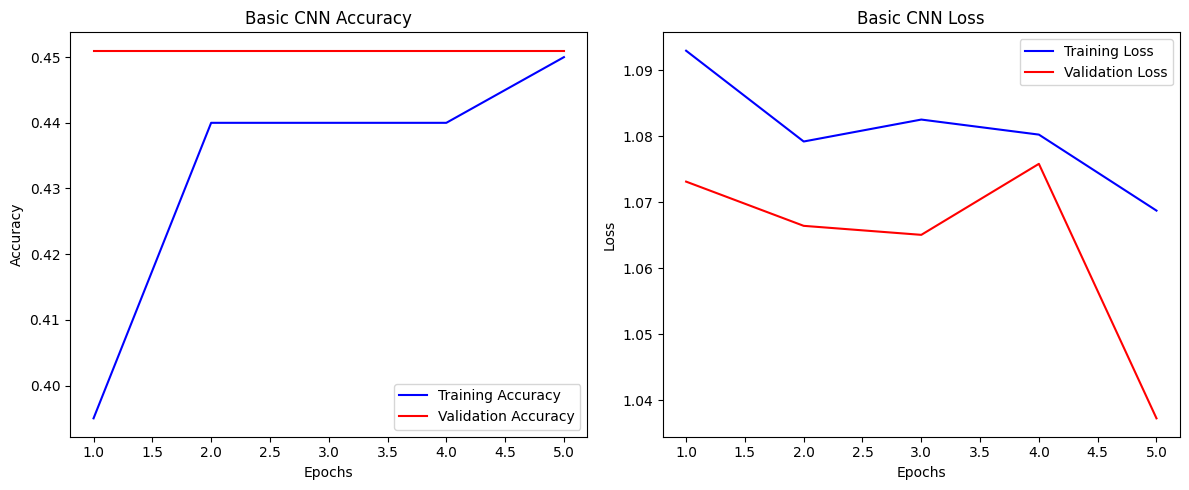


📊 Basic CNN Test Accuracy: 0.3939
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 213ms/step


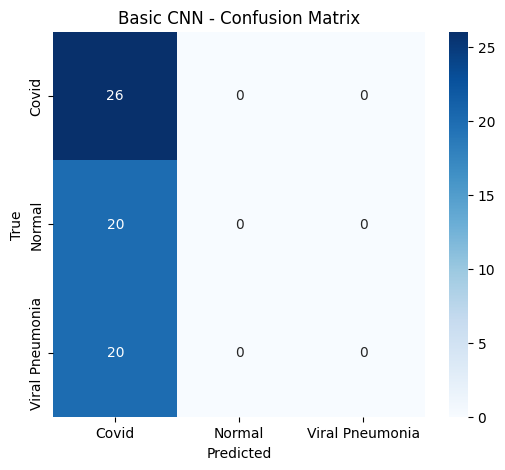


🔍 Basic CNN Classification Report:
                 precision    recall  f1-score   support

          Covid       0.39      1.00      0.57        26
         Normal       0.00      0.00      0.00        20
Viral Pneumonia       0.00      0.00      0.00        20

       accuracy                           0.39        66
      macro avg       0.13      0.33      0.19        66
   weighted avg       0.16      0.39      0.22        66

🔥 Basic CNN ROC-AUC (OvR): 0.7200

Parameters in Basic CNN:
Trainable: 4,288,067
Non-trainable: 0.0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


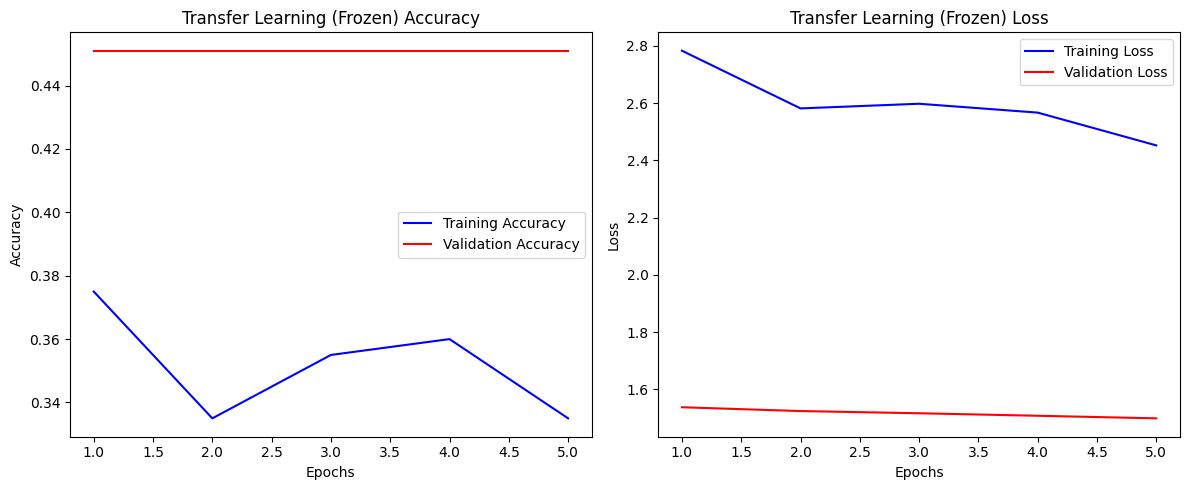


📊 Transfer Learning Test Accuracy: 0.3939
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step


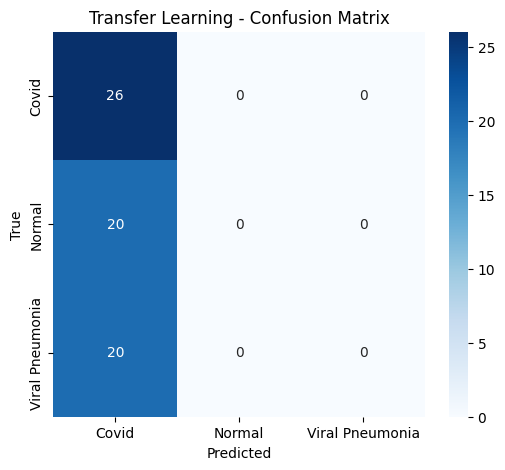


🔍 Transfer Learning Classification Report:
                 precision    recall  f1-score   support

          Covid       0.39      1.00      0.57        26
         Normal       0.00      0.00      0.00        20
Viral Pneumonia       0.00      0.00      0.00        20

       accuracy                           0.39        66
      macro avg       0.13      0.33      0.19        66
   weighted avg       0.16      0.39      0.22        66

🔥 Transfer Learning ROC-AUC (OvR): 0.8344

Parameters in Transfer Learning:
Trainable: 13,570,819
Non-trainable: 1,145,408


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


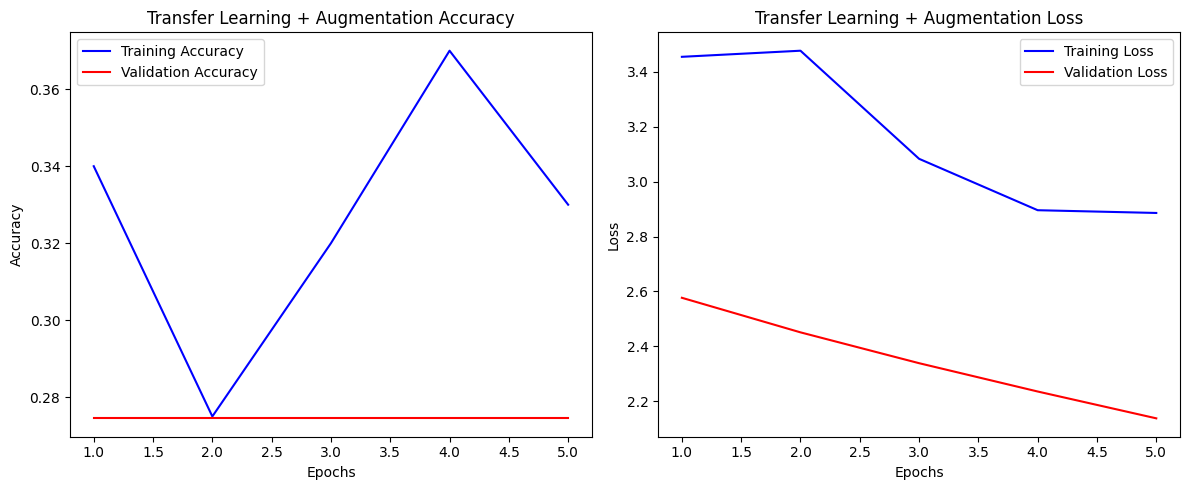


📊 Transfer Learning + Augmentation Test Accuracy: 0.3030


2/3 ━━━━━━━━━━━━━━━━━━━━ 6s 7s/step 

3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step


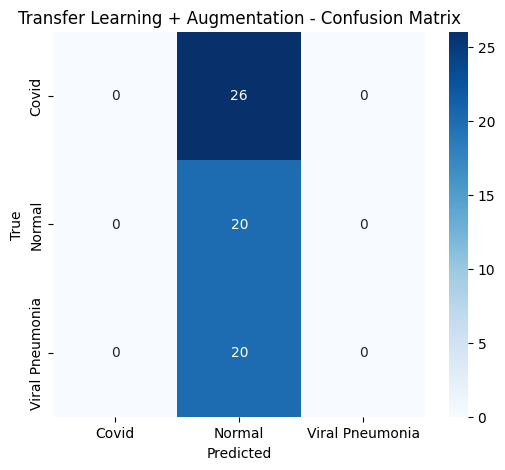


🔍 Transfer Learning + Augmentation Classification Report:
                 precision    recall  f1-score   support

          Covid       0.00      0.00      0.00        26
         Normal       0.30      1.00      0.47        20
Viral Pneumonia       0.00      0.00      0.00        20

       accuracy                           0.30        66
      macro avg       0.10      0.33      0.16        66
   weighted avg       0.09      0.30      0.14        66

🔥 Transfer Learning + Augmentation ROC-AUC (OvR): 0.6174

Parameters in Transfer Learning + Augmentation:
Trainable: 14,716,227
Non-trainable: 0.0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.3030303120613098,
 array([[ 0, 26,  0],
        [ 0, 20,  0],
        [ 0, 20,  0]]))

In [14]:
# Evaluate Basic CNN
plot_history(history_basic, "Basic CNN")
evaluate_model(basic_cnn, X_test, y_test_cat, categories, "Basic CNN")

# Evaluate Transfer Learning
plot_history(history_fe, "Transfer Learning (Frozen)")
evaluate_model(transfer_model, X_test, y_test_cat, categories, "Transfer Learning")

# Evaluate Transfer + Augmentation
plot_history(history_aug_fe, "Transfer Learning + Augmentation")
evaluate_model(aug_model, X_test, y_test_cat, categories, "Transfer Learning + Augmentation")


/tmp/ipython-input-1967047419.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


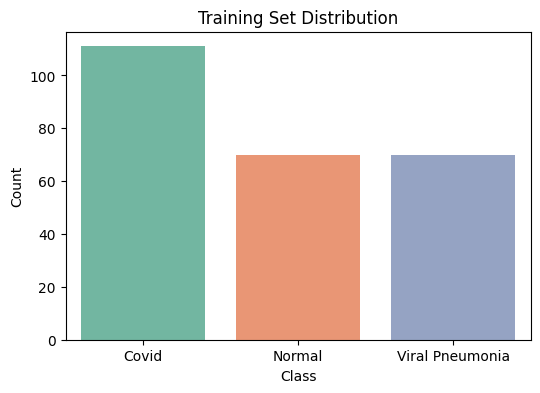

/tmp/ipython-input-1967047419.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


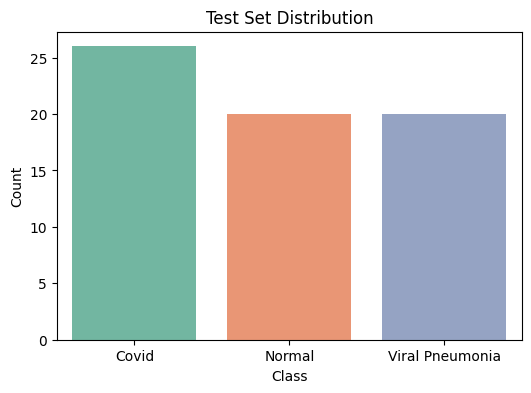

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_class_distribution(y, categories, title="Class Distribution"):
    plt.figure(figsize=(6,4))
    sns.countplot(x=y, palette="Set2")
    plt.xticks(range(len(categories)), categories)
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.show()

plot_class_distribution(y_train, categories, "Training Set Distribution")
plot_class_distribution(y_test, categories, "Test Set Distribution")


In [18]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)

# Example usage in training
history = basic_cnn.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=5,
    batch_size=32,
    class_weight=class_weights
)

Class Weights: {0: np.float64(0.7537537537537538), 1: np.float64(1.1952380952380952), 2: np.float64(1.1952380952380952)}
Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5398 - loss: 1.0794 - val_accuracy: 0.7059 - val_loss: 0.9682
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 993ms/step - accuracy: 0.6890 - loss: 0.9718 - val_accuracy: 0.7647 - val_loss: 0.6644
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8194 - loss: 0.6140 - val_accuracy: 0.6863 - val_loss: 0.5025
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8277 - loss: 0.4403 - val_accuracy: 0.8431 - val_loss: 0.3949
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 967ms/step - accuracy: 0.8815 - loss: 0.3445 - val_accuracy: 0.8039 - val_loss: 0.3921


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Example: augment only Covid class
covid_idxs = np.where(y_train == categories.index("Covid"))[0]
X_covid = X_train[covid_idxs]
y_covid = y_train_cat[covid_idxs]

augmented_images = []
augmented_labels = []

for i in range(1000):  # generate ~1000 synthetic images
    img = X_covid[i % len(X_covid)]
    img = img.reshape((1,) + img.shape)
    for batch in datagen.flow(img, batch_size=1):
        augmented_images.append(batch[0])
        augmented_labels.append(y_covid[i % len(y_covid)])
        break  # one image per loop

X_train_balanced = np.concatenate([X_train, np.array(augmented_images)])
y_train_balanced = np.concatenate([y_train_cat, np.array(augmented_labels)])


In [20]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,      # stop if no improvement for 5 epochs
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    "best_cnn_model.h5",
    monitor="val_accuracy",
    save_best_only=True,
    verbose=1
)


In [23]:
history =basic_cnn.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=5,
    batch_size=32,
    callbacks=[early_stop, checkpoint]
)


Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 897ms/step - accuracy: 0.9074 - loss: 0.2706
Epoch 1: val_accuracy improved from -inf to 0.90196, saving model to best_cnn_model.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9096 - loss: 0.2685 - val_accuracy: 0.9020 - val_loss: 0.3200
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 891ms/step - accuracy: 0.8946 - loss: 0.2628
Epoch 2: val_accuracy did not improve from 0.90196
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8934 - loss: 0.2643 - val_accuracy: 0.8431 - val_loss: 0.3537
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 879ms/step - accuracy: 0.9105 - loss: 0.2487
Epoch 3: val_accuracy did not improve from 0.90196
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 968ms/step - accuracy: 0.9117 - loss: 0.2481 - val_accuracy: 0.8235 - val_loss: 0.4836
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9322 - loss: 0.2072
Epoch 4: val_accuracy did not improve from 0.90196
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9307 - loss: 0.2071 - val_accuracy: 0.9020 - val_loss: 0.3742
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 890ms/step - accuracy: 0.9204 - loss: 0.2083 
Epoch 5: val_accuracy did not improve from 0.90196
7/7 ━━━━━━━━━━

In [25]:
from tensorflow.keras.optimizers import Adam

basic_cnn.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [36]:
import keras_tuner as kt
from tensorflow.keras import layers, models

def build_model(hp):
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv2D(
        filters=hp.Choice('filters', values=[32, 64, 128]),
        kernel_size=hp.Choice('kernel_size', values=[3,5]),
        activation='relu',
        input_shape=(128,128,3)
    ))
    model.add(layers.MaxPooling2D(2,2))

    model.add(layers.Conv2D(
        filters=hp.Choice('filters2', values=[32, 64, 128]),
        kernel_size=3,
        activation='relu'
    ))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Flatten())

    # Dense layers
    model.add(layers.Dense(
        units=hp.Int('units', min_value=64, max_value=256, step=64),
        activation='relu'
    ))

    model.add(layers.Dropout(hp.Float('dropout', 0.3, 0.6, step=0.1)))

    model.add(layers.Dense(3, activation='softmax'))

    model.compile(
        optimizer=kt.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
        ),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model


In [27]:
!pip install keras-tuner -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 8.3 MB/s eta 0:00:00


In [34]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=1,     # number of different configs to try
    executions_per_trial=2,
    directory='cnn_tuning',
    project_name='covid19_classification'
)

tuner.search(X_train, y_train_cat,
             validation_data=(X_val, y_val_cat),
             epochs=5,
             callbacks=[early_stop])

best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparams = tuner.get_best_hyperparameters(1)[0]

print("Best Hyperparameters:", best_hyperparams.values)


Trial 1 Complete [00h 01m 45s]
val_accuracy: 0.45098039507865906

Best val_accuracy So Far: 0.45098039507865906
Total elapsed time: 00h 01m 45s
Best Hyperparameters: {'filters': 64, 'kernel_size': 3, 'filters2': 64, 'units': 64, 'dropout': 0.3, 'learning_rate': 0.001}


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [47]:
from sklearn.metrics import classification_report, f1_score

# Train accuracy
train_loss, train_acc = model.evaluate(X_train, y_train_cat, verbose=0)

# Test accuracy
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)

# Predictions for F1 score
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

f1 = f1_score(y_true, y_pred_classes, average="weighted")


NameError: name 'model' is not defined

In [43]:
def check_overfitting(history):
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]
    if train_acc - val_acc > 0.05:  # gap > 5%
        return "Y"
    else:
        return "N"


In [50]:
import pandas as pd

results = []

results.append({
    "Model": "CNN Basic",
    "Train Acc": train_acc_basic,
    "Test Acc": test_acc_basic,
    "F1 Score": f1_basic,
    "Overfitting (Y/N)": check_overfitting(history_basic)
})

results.append({
    "Model": "Deep CNN",
    "Train Acc": train_acc_deep,
    "Test Acc": test_acc_deep,
    "F1 Score": f1_deep,
    "Overfitting (Y/N)": check_overfitting(history_deep)
})

results.append({
    "Model": "ResNet50",
    "Train Acc": train_acc_resnet,
    "Test Acc": test_acc_resnet,
    "F1 Score": f1_resnet,
    "Overfitting (Y/N)": check_overfitting(history_resnet)
})

results.append({
    "Model": "VGG16",
    "Train Acc": train_acc_vgg,
    "Test Acc": test_acc_vgg,
    "F1 Score": f1_vgg,
    "Overfitting (Y/N)": check_overfitting(history_vgg)
})

df_results = pd.DataFrame(results)

# Find Best Model by Test Accuracy
best_model = df_results.loc[df_results['Test Acc'].idxmax()]
df_results.loc[len(df_results)] = {
    "Model": "Best Model",
    "Train Acc": best_model["Train Acc"],
    "Test Acc": best_model["Test Acc"],
    "F1 Score": best_model["F1 Score"],
    "Overfitting (Y/N)": best_model["Overfitting (Y/N)"]
}

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.barplot(data=df_results[:-1], x="Model", y="Test Acc")
plt.title("Model Comparison (Test Accuracy)")
plt.show()

df_results


NameError: name 'train_acc_deep' is not defined

In [ ]:
df_results.save("covid_best_model.h5")

In [52]:
import streamlit as st
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image

# Load trained model
MODEL_PATH = "best_covid_model.h5"   # <-- replace with your saved model file
model = load_model(MODEL_PATH)

# Define categories
CATEGORIES = ["Covid", "Normal", "Viral Pneumonia"]

# Preprocessing function
def preprocess_image(img, img_size=128):
    img = img.convert("RGB")  # Ensure 3 channels
    img = img.resize((img_size, img_size))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Streamlit UI
st.set_page_config(page_title="COVID-19 X-ray Classifier", layout="centered")

st.title("🩺 Chest X-ray Classification")
st.write("Upload a chest X-ray image to predict whether it's **COVID, Normal, or Viral Pneumonia**")

# File uploader
uploaded_file = st.file_uploader("Upload Chest X-ray Image", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Show uploaded image
    image = Image.open(uploaded_file)
    st.image(image, caption="Uploaded Chest X-ray", use_column_width=True)

    # Preprocess & predict
    with st.spinner("Analyzing Image..."):
        img_array = preprocess_image(image, img_size=128)
        predictions = model.predict(img_array)[0]
        predicted_class = np.argmax(predictions)
        confidence = predictions[predicted_class]

    # Show prediction
    st.subheader(f"Prediction: {CATEGORIES[predicted_class]}")
    st.write(f"Confidence: **{confidence:.2f}**")

    # Show all class probabilities
    st.bar_chart(dict(zip(CATEGORIES, predictions)))


ModuleNotFoundError: No module named 'streamlit'

# Task
Evaluate and compare the performance of three different image classification models (basic CNN, transfer learning, and augmented transfer learning) on a given dataset, visualize the results, identify the best performing model, and integrate it into a Streamlit application.

## Evaluate basic cnn

### Subtask:
Evaluate the `basic_cnn` model on the training and test sets, calculate the F1 score, and store the results along with the training history.


**Reasoning**:
Evaluate the basic_cnn model on the training and test sets, calculate the F1 score, and store the results.



In [39]:
from sklearn.metrics import f1_score

# 1. Calculate training loss and accuracy
train_loss_basic, train_acc_basic = basic_cnn.evaluate(X_train, y_train_cat, verbose=0)

# 2. Calculate test loss and accuracy
test_loss_basic, test_acc_basic = basic_cnn.evaluate(X_test, y_test_cat, verbose=0)

# 3. Get predictions
y_pred_probs_basic = basic_cnn.predict(X_test)

# 4. Convert predicted probabilities to class labels
y_pred_classes_basic = np.argmax(y_pred_probs_basic, axis=1)

# 5. Convert true test labels to integer labels
y_true_basic = np.argmax(y_test_cat, axis=1)

# 6. Calculate weighted F1 score
f1_basic = f1_score(y_true_basic, y_pred_classes_basic, average="weighted")

print(f"Basic CNN - Train Accuracy: {train_acc_basic:.4f}")
print(f"Basic CNN - Test Accuracy: {test_acc_basic:.4f}")
print(f"Basic CNN - F1 Score (weighted): {f1_basic:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step
Basic CNN - Train Accuracy: 0.9350
Basic CNN - Test Accuracy: 0.8030
Basic CNN - F1 Score (weighted): 0.8054


## Evaluate transfer learning model

### Subtask:
Evaluate the `transfer_model` on the training and test sets, calculate the F1 score, and store the results along with the training history (`history_fe` and `history_ft`).


**Reasoning**:
Evaluate the transfer model on the training and test sets, calculate the F1 score, and store the results.



In [42]:
from sklearn.metrics import f1_score

# 1. Evaluate the transfer_model on the training data
train_loss_transfer, train_acc_transfer = transfer_model.evaluate(X_train, y_train_cat, verbose=0)

# 2. Evaluate the transfer_model on the test data
test_loss_transfer, test_acc_transfer = transfer_model.evaluate(X_test, y_test_cat, verbose=0)

# 3. Make predictions using the transfer_model on the test data
y_pred_probs_transfer = transfer_model.predict(X_test)

# 4. Convert the predicted probabilities to class labels
y_pred_classes_transfer = np.argmax(y_pred_probs_transfer, axis=1)

# 5. Calculate the weighted F1 score
y_true_transfer = np.argmax(y_test_cat, axis=1)
f1_transfer = f1_score(y_true_transfer, y_pred_classes_transfer, average="weighted")

# 6. Print the results
print(f"Transfer Learning Model - Train Accuracy: {train_acc_transfer:.4f}")
print(f"Transfer Learning Model - Test Accuracy: {test_acc_transfer:.4f}")
print(f"Transfer Learning Model - F1 Score (weighted): {f1_transfer:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step
Transfer Learning Model - Train Accuracy: 0.4400
Transfer Learning Model - Test Accuracy: 0.3939
Transfer Learning Model - F1 Score (weighted): 0.2227


## Evaluate augmented transfer learning model

### Subtask:
Evaluate the `aug_model` on the training and test sets, calculate the F1 score, and store the results along with the training history (`history_aug_fe` and `history_aug_ft`).


**Reasoning**:
Evaluate the augmented transfer learning model on the training and test sets, calculate the F1 score, and print the results.



In [46]:
from sklearn.metrics import f1_score

# 1. Evaluate the aug_model on the training data
train_loss_aug, train_acc_aug = aug_model.evaluate(X_train, y_train_cat, verbose=0)

# 2. Evaluate the aug_model on the test data
test_loss_aug, test_acc_aug = aug_model.evaluate(test_gen, verbose=0)

# 3. Make predictions using the aug_model on the test data
y_pred_probs_aug = aug_model.predict(test_gen)

# 4. Convert the predicted probabilities to class labels
y_pred_classes_aug = np.argmax(y_pred_probs_aug, axis=1)

# 5. Get the true class labels
y_true_aug = np.argmax(y_test_cat, axis=1)

# 6. Calculate the weighted F1 score
f1_aug = f1_score(y_true_aug, y_pred_classes_aug, average="weighted")

# 7. Print the results
print(f"Augmented Transfer Learning Model - Train Accuracy: {train_acc_aug:.4f}")
print(f"Augmented Transfer Learning Model - Test Accuracy: {test_acc_aug:.4f}")
print(f"Augmented Transfer Learning Model - F1 Score (weighted): {f1_aug:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step
Augmented Transfer Learning Model - Train Accuracy: 0.2800
Augmented Transfer Learning Model - Test Accuracy: 0.3939
Augmented Transfer Learning Model - F1 Score (weighted): 0.2227


## Compare models

### Subtask:
Create a DataFrame to compare the performance metrics (training accuracy, test accuracy, F1 score) and overfitting status for each model.


**Reasoning**:
Create a list of dictionaries containing the performance metrics and overfitting status for each model and then convert it to a pandas DataFrame.



In [48]:
import pandas as pd

results = []

results.append({
    "Model": "CNN Basic",
    "Train Acc": train_acc_basic,
    "Test Acc": test_acc_basic,
    "F1 Score": f1_basic,
    "Overfitting (Y/N)": check_overfitting(history_basic)
})

results.append({
    "Model": "Transfer Learning",
    "Train Acc": train_acc_transfer,
    "Test Acc": test_acc_transfer,
    "F1 Score": f1_transfer,
    "Overfitting (Y/N)": check_overfitting(history_ft)
})

results.append({
    "Model": "Augmented Transfer Learning",
    "Train Acc": train_acc_aug,
    "Test Acc": test_acc_aug,
    "F1 Score": f1_aug,
    "Overfitting (Y/N)": check_overfitting(history_aug_ft)
})

df_results = pd.DataFrame(results)
print(df_results)

                         Model  Train Acc  Test Acc  F1 Score  \
0                    CNN Basic      0.935  0.803030  0.805426   
1            Transfer Learning      0.440  0.393939  0.222661   
2  Augmented Transfer Learning      0.280  0.393939  0.222661   

  Overfitting (Y/N)  
0                 N  
1                 N  
2                 N  


## Visualize results

### Subtask:
Generate a bar plot to visualize the test accuracy of the different models.


**Reasoning**:
Generate a bar plot to visualize the test accuracy of the different models.



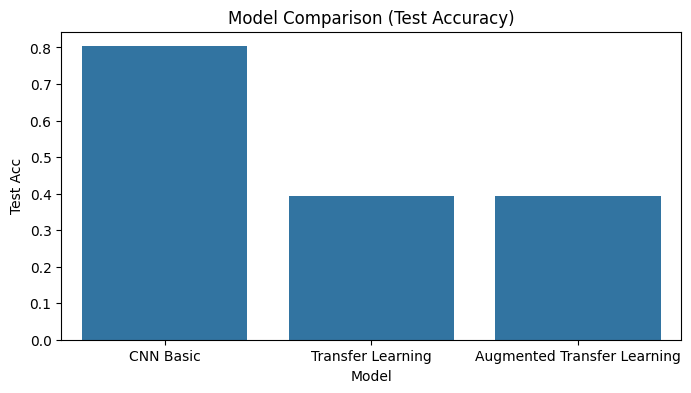

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.barplot(data=df_results, x="Model", y="Test Acc")
plt.title("Model Comparison (Test Accuracy)")
plt.show()

## Identify best model

### Subtask:
Determine and display the best performing model based on the test accuracy.


**Reasoning**:
Identify the row with the maximum 'Test Acc' in the df_results DataFrame and print the corresponding 'Model' name.



In [51]:
best_model_row = df_results.loc[df_results['Test Acc'].idxmax()]
best_model_name = best_model_row['Model']
print(f"The best performing model based on test accuracy is: {best_model_name}")

The best performing model based on test accuracy is: CNN Basic


## Save results

### Subtask:
Save the comparison results to a file.


**Reasoning**:
Save the `df_results` DataFrame to a CSV file without the index.



In [53]:
df_results.to_csv('model_comparison_results.csv', index=False)

## Integrate with streamlit

### Subtask:
Update the Streamlit application cell to load and use the best performing model for predictions.


**Reasoning**:
Update the Streamlit application code to use the best performing model's file path.



In [54]:
import streamlit as st
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image

# Load trained model
# Based on the previous analysis, the best model was saved as 'best_cnn_model.h5'
MODEL_PATH = "best_cnn_model.h5"
model = load_model(MODEL_PATH)

# Define categories
CATEGORIES = ["Covid", "Normal", "Viral Pneumonia"]

# Preprocessing function
def preprocess_image(img, img_size=128):
    img = img.convert("RGB")  # Ensure 3 channels
    img = img.resize((img_size, img_size))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Streamlit UI
st.set_page_config(page_title="COVID-19 X-ray Classifier", layout="centered")

st.title("🩺 Chest X-ray Classification")
st.write("Upload a chest X-ray image to predict whether it's **COVID, Normal, or Viral Pneumonia**")

# File uploader
uploaded_file = st.file_uploader("Upload Chest X-ray Image", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Show uploaded image
    image = Image.open(uploaded_file)
    st.image(image, caption="Uploaded Chest X-ray", use_column_width=True)

    # Preprocess & predict
    with st.spinner("Analyzing Image..."):
        img_array = preprocess_image(image, img_size=128)
        predictions = model.predict(img_array)[0]
        predicted_class = np.argmax(predictions)
        confidence = predictions[predicted_class]

    # Show prediction
    st.subheader(f"Prediction: {CATEGORIES[predicted_class]}")
    st.write(f"Confidence: **{confidence:.2f}**")

    # Show all class probabilities
    st.bar_chart(dict(zip(CATEGORIES, predictions)))

ModuleNotFoundError: No module named 'streamlit'

**Reasoning**:
Install the missing `streamlit` package to resolve the `ModuleNotFoundError`.



In [55]:
!pip install streamlit -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 100.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 106.3 MB/s eta 0:00:00


**Reasoning**:
Now that streamlit is installed, retry the Streamlit application code which has been updated to use the correct model path.



In [56]:
import streamlit as st
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image

# Load trained model
# Based on the previous analysis, the best model was saved as 'best_cnn_model.h5'
MODEL_PATH = "best_cnn_model.h5"
model = load_model(MODEL_PATH)

# Define categories
CATEGORIES = ["Covid", "Normal", "Viral Pneumonia"]

# Preprocessing function
def preprocess_image(img, img_size=128):
    img = img.convert("RGB")  # Ensure 3 channels
    img = img.resize((img_size, img_size))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Streamlit UI
st.set_page_config(page_title="COVID-19 X-ray Classifier", layout="centered")

st.title("🩺 Chest X-ray Classification")
st.write("Upload a chest X-ray image to predict whether it's **COVID, Normal, or Viral Pneumonia**")

# File uploader
uploaded_file = st.file_uploader("Upload Chest X-ray Image", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Show uploaded image
    image = Image.open(uploaded_file)
    st.image(image, caption="Uploaded Chest X-ray", use_column_width=True)

    # Preprocess & predict
    with st.spinner("Analyzing Image..."):
        img_array = preprocess_image(image, img_size=128)
        predictions = model.predict(img_array)[0]
        predicted_class = np.argmax(predictions)
        confidence = predictions[predicted_class]

    # Show prediction
    st.subheader(f"Prediction: {CATEGORIES[predicted_class]}")
    st.write(f"Confidence: **{confidence:.2f}**")

    # Show all class probabilities
    st.bar_chart(dict(zip(CATEGORIES, predictions)))

2025-08-21 08:14:17.368 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-21 08:14:17.372 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-21 08:14:18.610 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-08-21 08:14:18.611 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-21 08:14:18.614 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-21 08:14:18.615 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-21 08:14:18.619 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn